# Classification 2

## Exercise 1: Exploratory Data Analysis

### Overview

The objective of this course is to build models to predict customer churn for a fictitious telco company. Before we start creating models, let's begin by having a closer look at our data and doing some basic data wrangling.

Go through this notebook and modify the code accordingly (i.e. #TASK) based on the text and/or the comments.

### Data
Download data from here:
https://public.dhe.ibm.com/software/data/sw-library/cognos/mobile/C11/data/Telco_customer_churn.xlsx

Description of data (for a newer version)
https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd 

# TASK: Import visualization libraries, matplotlib and seaborn using standard aliases plt and sns respectively

### Reading in the Data

In [2]:
# TASK: Read in the Excel file. Use the parameter na_values=" " to convert any empty cells to a NA value
data =pd.read_excel('Telco_customer_churn.xlsx', na_values=" ")  # TASK: Use pandas to read in an Excel file. 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
CustomerID           7043 non-null object
Count                7043 non-null int64
Country              7043 non-null object
State                7043 non-null object
City                 7043 non-null object
Zip Code             7043 non-null int64
Lat Long             7043 non-null object
Latitude             7043 non-null float64
Longitude            7043 non-null float64
Gender               7043 non-null object
Senior Citizen       7043 non-null object
Partner              7043 non-null object
Dependents           7043 non-null object
Tenure Months        7043 non-null int64
Phone Service        7043 non-null object
Multiple Lines       7043 non-null object
Internet Service     7043 non-null object
Online Security      7043 non-null object
Online Backup        7043 non-null object
Device Protection    7043 non-null object
Tech Support         7043 non-null object
Streaming TV

In [4]:
# Define columns to keep and filter the original dataset
cols_to_keep = ['CustomerID', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label']
data = data[cols_to_keep]

In [5]:
data.head(2)

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label
0,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
1,9237-HQITU,Female,No,No,Yes,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# TASK: Rename the multi-worded columns to remove the space 
# HINT: You can either manually remove the spaces in the column name list or use a loop to remove the space
data.columns =[column.replace(' ', '') if ' ' in column else column for column in data.columns]

In [7]:
# TASK: Display the number of rows and columns for the dataset
print("Rows & Columns: {}".format(data.shape))

Rows & Columns: (7043, 21)


In [8]:
# TASK: Display the datatypes for the columns in the dataframe i.e. use the dtypes variable
# How many columns are numerical and how many are non-numerical
data.dtypes

CustomerID           object
Gender               object
SeniorCitizen        object
Partner              object
Dependents           object
TenureMonths          int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
ChurnLabel           object
dtype: object

In [9]:
# TASK: use count() on the dataframe to count the number of entries for each of the column. Are there any columns with missing values?
data.count()

CustomerID          7043
Gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
TenureMonths        7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7032
ChurnLabel          7043
dtype: int64

In [10]:
data.isna().sum()

CustomerID           0
Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
TenureMonths         0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
ChurnLabel           0
dtype: int64

In [11]:
# TASK: Use nunique() on the dataframe to count the number of unique values for each of the columns
data.nunique()

CustomerID          7043
Gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
TenureMonths          73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
ChurnLabel             2
dtype: int64

In [12]:
# TASK: Display first few values of the dataframe
# Based on this and the previous display, how would you describe the columns with a small number (less than 10) of unique values?
data.head(5)

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel
0,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
1,9237-HQITU,Female,No,No,Yes,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
2,9305-CDSKC,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
3,7892-POOKP,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
4,0280-XJGEX,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes


In [15]:
data['TenureMonths'].mean()

32.37114865824223

In [46]:
# TASK: Let's analyze the values for the categorical features (columns with less than 10 unique values)
for id, row in data.nunique().iteritems(): # this counts the number of unique values for each feature and returns the result as a dictionary
    if(row < 10):
        # TASK: Print out the unique values for the feature
        print(data[id].unique())

['Male' 'Female']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes' 'No phone service']
['DSL' 'Fiber optic' 'No']
['Yes' 'No' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'Two year' 'One year']
['Yes' 'No']
['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['Yes' 'No']


In [47]:
# For columns with 3 or 4 unique values, display them to see if they make sense
for col in ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', "PaymentMethod"]:
    print("{} : {}".format(col, np.unique(data[col].values)))

MultipleLines : ['No' 'No phone service' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'No internet service' 'Yes']
OnlineBackup : ['No' 'No internet service' 'Yes']
DeviceProtection : ['No' 'No internet service' 'Yes']
TechSupport : ['No' 'No internet service' 'Yes']
StreamingTV : ['No' 'No internet service' 'Yes']
StreamingMovies : ['No' 'No internet service' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']


**Observations**

- The value 'No phone service' found in MultipleLines is already captured by the PhoneService feature ('No' value)
- The value 'No internet service' found in the several features is already captured by InternetService feature ('No' value)
- Values that are longer or more complex may need to be simplified.

Conclusion: These values can be considered duplicated information as they are found in the PhoneService and InternetService features. There are several options to consider here:

- Retain all features and values as is
- Convert the 'No Internet Service'/'No phone service' to 'No' in the features as PhoneService and InternetService features has already captured this information
- Remove the PhoneService feature as MultipleLines feature has this information. To remove the InternetService feature, we would have to 'fold in' the values in the other features e.g. the values for OnlineSecurity could be changed to ['DSL_No','DSL_Yes','FiberOptic_No','FiberOptic_Yes','No internet service']

For this course, we will be using the second option (without justification). You are encouraged to test the others options during modelling to see if there are any impact.

### Data Wrangling

Based on the discoveries made above, we will be modifying our data before continuing the exploration.

In [48]:
# Replace 'No phone service'
data['MultipleLines'] = data['MultipleLines'].replace({'No phone service':'No'})

In [49]:
# TASK: Replace 'No internet service'
for col in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    data[col] = data[col].replace({'No internet service':'No'}) # similar to the operation for 'No phone service' above

In [50]:
# Simplify the values made up of phrases
data['PaymentMethod'] = data['PaymentMethod'].replace({
    'Bank transfer (automatic)':'transfer',
    'Credit card (automatic)':'creditcard',
    'Electronic check':'echeck',
    'Mailed check':'mcheck'
})

data['InternetService'] = data['InternetService'].replace({
    'Fiber optic':'FiberOptic'
})

data['Contract'] = data['Contract'].replace({
    'Month-to-month':'M2M',
    'One year':'OneYear',
    'Two year':'TwoYear'
})

In [51]:
# Remove the rows with empty TotalCharges value
data = data[data["TotalCharges"].notnull()]

In [52]:
# After data wrangling, repeat prints
print("Rows & Columns: {}".format(data.shape))
print("################################################")
# Number of unique values for each of the columns
print(data.nunique())
print("################################################")
# Check the data types
print(data.dtypes)
print("################################################")
# Display first few values
print(data.head())

Rows & Columns: (7032, 21)
################################################
CustomerID          7032
Gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
TenureMonths          72
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
ChurnLabel             2
dtype: int64
################################################
CustomerID           object
Gender               object
SeniorCitizen        object
Partner              object
Dependents           object
TenureMonths          int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
T

In [53]:
# Randomly display 1 row from the dataframe
print(data.sample(n=1).iloc[0])

CustomerID          2560-QTSBS
Gender                  Female
SeniorCitizen               No
Partner                    Yes
Dependents                 Yes
TenureMonths                72
PhoneService               Yes
MultipleLines              Yes
InternetService             No
OnlineSecurity              No
OnlineBackup                No
DeviceProtection            No
TechSupport                 No
StreamingTV                 No
StreamingMovies             No
Contract               OneYear
PaperlessBilling           Yes
PaymentMethod         transfer
MonthlyCharges            23.3
TotalCharges           1623.15
ChurnLabel                  No
Name: 4512, dtype: object


In [54]:
# TASK: Save the data as a CSV fiile
data.to_csv("telco_churn.csv", index=False)

### Additional Exploration

**TASK:** This is the open-ended section of the exercise. Use any exploration techniques that you know to further explore and understand your data. We expect a number of visualizations that can show the relationships between features as well as between features and the outcome variable 'ChurnLabel'. Some of the questions in the quiz may require you to perform additional analyses.

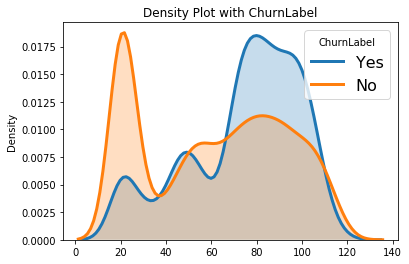

In [17]:
# Example: Look at Churn vs MonthCharges
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.clf()
for label in ['Yes','No']:
    subset = data[data.ChurnLabel==label]
    
    # Draw the density plot
    sns.distplot(subset['MonthlyCharges'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3, 'shade':True},
                 label = label)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'ChurnLabel')
plt.title('Density Plot with ChurnLabel')
plt.xlabel('') # Monthly Charges
plt.ylabel('Density')
plt.show()

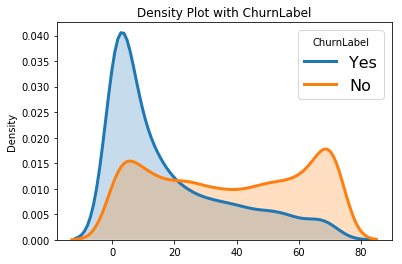

In [19]:
# Additional Exploration
# Example: Look at Churn vs MonthCharges
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.clf()
for label in ['Yes','No']:
    subset = data[data.ChurnLabel==label]
    
    # Draw the density plot
    sns.distplot(subset['TenureMonths'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3, 'shade':True},
                 label = label)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'ChurnLabel')
plt.title('Density Plot with ChurnLabel')
plt.xlabel('') # Monthly Charges
plt.ylabel('Density')
plt.show()